In [21]:
#Llamar al dataloader
%run DataLoader.ipynb
!pip install geotext


In [22]:
from geotext import GeoText

In [23]:
dataset.head(5)

,keyword,location,text,target,longitud
id,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True,69
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True,38
5,NaN,NaN,All residents asked to 'shelter in place' are ...,True,133
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True,65
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True,88


In [24]:
null_count = dataset.location.isnull().value_counts()
null_count

False    5080
True     2533
Name: location, dtype: int64

In [25]:
null_count[0]


5080

In [26]:
dataset.location.value_counts()

USA                        104
New York                    71
United States               50
London                      45
Canada                      29
                          ... 
sweden                       1
GCC                          1
College Station, TX          1
whs '17                      1
illinois. united state       1
Name: location, Length: 3341, dtype: int64

In [27]:
top_locations = dataset.location.value_counts().reset_index()
top_locations.columns = ['Ubicacion', 'Cantidad']

top_locations


,Ubicacion,Cantidad
0,USA,104
1,New York,71
2,United States,50
3,London,45
4,Canada,29
...,...,...
3336,sweden,1
3337,GCC,1
3338,"College Station, TX",1
3339,whs '17,1


In [28]:
top_locations.describe()
# hay muchas ciudades con un solo elemento, como que la "cola" tiene mucho peso

,Cantidad
count,3341.000000
mean,1.520503
std,3.022364
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,104.000000


In [29]:
# cantidad de ubicaciones con un solo elemento (son muchas!! 2818 / 3341)
top_locations.loc[top_locations['Cantidad']< 2].count()

Ubicacion    2818
Cantidad     2818
dtype: int64

Text(0.5, 1.0, 'Análisis de las ubicaciones más frecuentes')

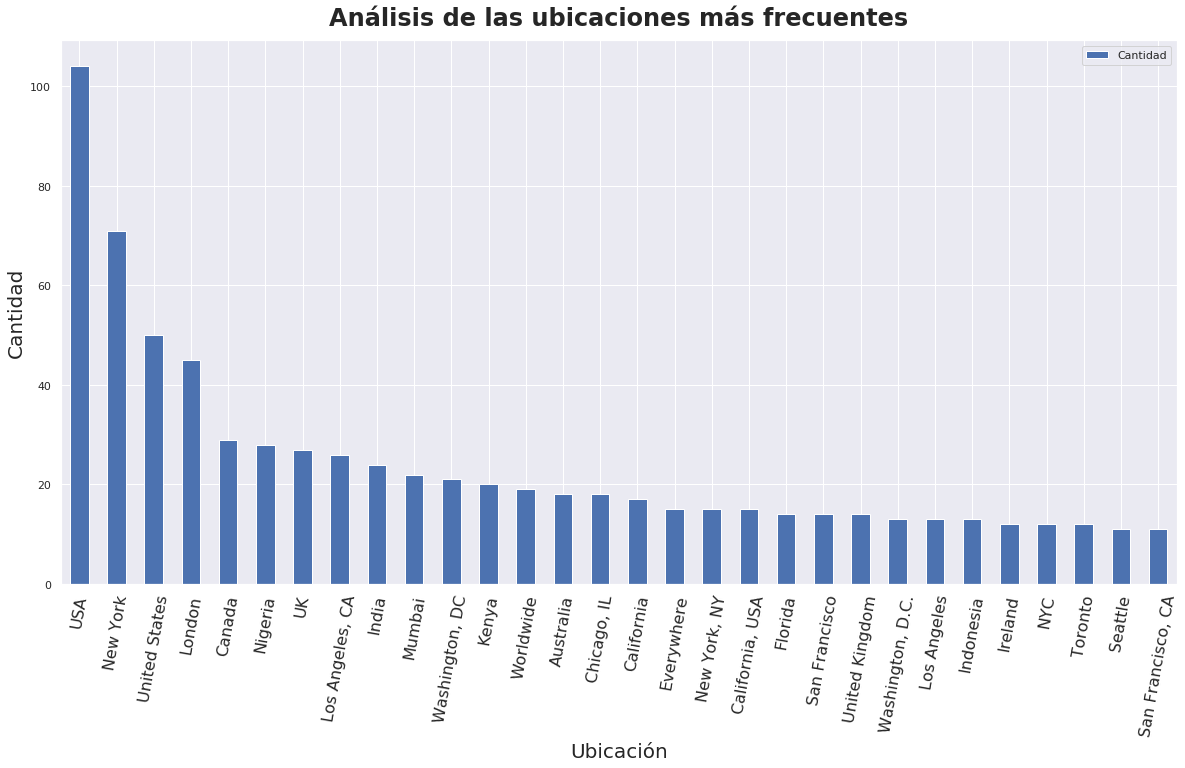

In [30]:
fig, ax = plt.subplots()


top_locations.nlargest(30, 'Cantidad').plot(kind='bar', x = 'Ubicacion', ax = ax)

plt.xlabel("Ubicación",fontsize=20)
plt.ylabel('Cantidad',fontsize=20)
plt.xticks(fontsize=16,rotation = 80) 
plt.title('Análisis de las ubicaciones más frecuentes',fontsize=24,fontweight='bold', pad = 15)




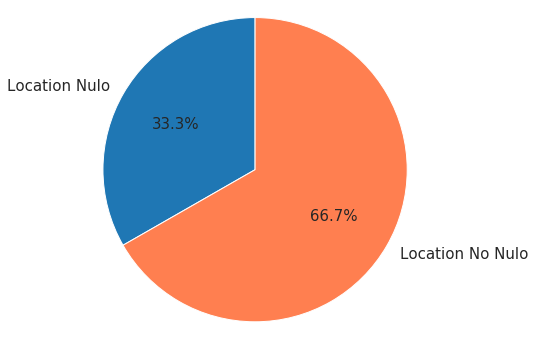

In [31]:
location_nonnull_count = null_count[0]
location_null_count = null_count[1]


labels = 'Location Nulo', 'Location No Nulo'
sizes = [location_null_count, location_nonnull_count]
colors = ('#1f77b4', 'coral')

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, textprops={'fontsize': 15}, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [34]:
def getCountry (text):
    
    
    countries = list(GeoText(text).country_mentions)
        
    if len(countries) != 0:
        return countries[0]
    else:
        text = text.lower()
        others = {'usa':'US', 'uk':'GB', 'california':'US', 'nyc':'US', 'scotland':'GB',
                 'tennesse':'US', 'north carolina':'US'}
        for key in others.keys():
            if key in text:
                return others[key]
        return "other"
                
    

top_locations['Pais'] = top_locations.Ubicacion.map(lambda x: getCountry(x))
top_locations.head(10)


,Ubicacion,Cantidad,Pais
0,USA,104,US
1,New York,71,US
2,United States,50,US
3,London,45,GB
4,Canada,29,CA
5,Nigeria,28,NG
6,UK,27,GB
7,"Los Angeles, CA",26,US
8,India,24,IN
9,Mumbai,22,IN


In [36]:
top_locations.loc[top_locations['Pais']=='other',:].count()

Ubicacion    1714
Cantidad     1714
Pais         1714
dtype: int64

In [37]:
top_locations.loc[top_locations['Pais']=='other',:].head(10)

,Ubicacion,Cantidad,Pais
12,Worldwide,19,other
16,Everywhere,15,other
31,Earth,11,other
34,ss,10,other
39,US,9,other
40,304,9,other
44,World,9,other
57,worldwide,7,other
60,Massachusetts,6,other
61,Road to the Billionaires Club,6,other
